In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

#Load the data
df = pd.read_csv('Premier_League_Season_With_Team_IDs.csv')

# Feature selection (using match stats, removing betting odds)
features = ['HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']
X = df[features]
y = df['FTR']  # Target: Full-time result

# Split the data by season (using Season column for the split)
train_df = df[df['Season'] != 2024]  # All seasons except 2024 for training
test_df = df[df['Season'] == 2024]   # Only 2024 season for testing

# Features and target for training and testing
X_train = train_df[features]
y_train = train_df['FTR']
X_test = test_df[features]
y_test = test_df['FTR']

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 1. Model with unbalanced data
rf_unbalanced = RandomForestClassifier(random_state=42)
rf_unbalanced.fit(X_train, y_train)
y_pred_unbalanced = rf_unbalanced.predict(X_test)

print("Unbalanced Data Results (Testing on Season 2024)")
print(confusion_matrix(y_test, y_pred_unbalanced))
print(classification_report(y_test, y_pred_unbalanced))


# 2. Handling class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Model with balanced data
rf_balanced = RandomForestClassifier(random_state=42)
rf_balanced.fit(X_train_balanced, y_train_balanced)
y_pred_balanced = rf_balanced.predict(X_test)

print("Balanced Data Results (Testing on Season 2024)")
print(confusion_matrix(y_test, y_pred_balanced))
print(classification_report(y_test, y_pred_balanced))

Unbalanced Data Results (Testing on Season 2024)
[[42  5 17]
 [22  5 22]
 [14  4 71]]
              precision    recall  f1-score   support

           A       0.54      0.66      0.59        64
           D       0.36      0.10      0.16        49
           H       0.65      0.80      0.71        89

    accuracy                           0.58       202
   macro avg       0.51      0.52      0.49       202
weighted avg       0.54      0.58      0.54       202

Balanced Data Results (Testing on Season 2024)
[[42 10 12]
 [20  9 20]
 [14 12 63]]
              precision    recall  f1-score   support

           A       0.55      0.66      0.60        64
           D       0.29      0.18      0.23        49
           H       0.66      0.71      0.68        89

    accuracy                           0.56       202
   macro avg       0.50      0.52      0.50       202
weighted avg       0.54      0.56      0.55       202



In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Load your data
df = pd.read_csv('Premier_League_Season_With_Team_IDs.csv')

# Feature selection (using match stats, removing betting odds)
features = ['HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']
X = df[features]
y = df['FTR']  # Target: Full-time result

# Encode the target variable (convert 'H', 'D', 'A' to 0, 1, 2)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data by season (using Season column for the split)
train_df = df[df['Season'] != 2024]  # All seasons except 2024 for training
test_df = df[df['Season'] == 2024]   # Only 2024 season for testing

# Features and target for training and testing
X_train = train_df[features]
y_train = label_encoder.transform(train_df['FTR'])
X_test = test_df[features]
y_test = label_encoder.transform(test_df['FTR'])

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(eval_metric='mlogloss'),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'k-NN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

# Train and evaluate models on unbalanced data
print("Unbalanced Data Results (Testing on Season 2024)")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_unbalanced = model.predict(X_test)
    print(f"\n{name} (Unbalanced Data)")
    print(confusion_matrix(y_test, y_pred_unbalanced))
    print(classification_report(y_test, y_pred_unbalanced))

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Train and evaluate models on balanced data
print("\nBalanced Data Results (Testing on Season 2024)")
for name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)
    y_pred_balanced = model.predict(X_test)
    print(f"\n{name} (Balanced Data)")
    print(confusion_matrix(y_test, y_pred_balanced))
    print(classification_report(y_test, y_pred_balanced))

Unbalanced Data Results (Testing on Season 2024)

Random Forest (Unbalanced Data)
[[42  5 17]
 [22  5 22]
 [14  4 71]]
              precision    recall  f1-score   support

           0       0.54      0.66      0.59        64
           1       0.36      0.10      0.16        49
           2       0.65      0.80      0.71        89

    accuracy                           0.58       202
   macro avg       0.51      0.52      0.49       202
weighted avg       0.54      0.58      0.54       202


XGBoost (Unbalanced Data)
[[38 11 15]
 [18 10 21]
 [10 12 67]]
              precision    recall  f1-score   support

           0       0.58      0.59      0.58        64
           1       0.30      0.20      0.24        49
           2       0.65      0.75      0.70        89

    accuracy                           0.57       202
   macro avg       0.51      0.52      0.51       202
weighted avg       0.54      0.57      0.55       202


Naive Bayes (Unbalanced Data)
[[44  5 15]
 [23  4 22]


In [5]:
import pandas as pd

# Initialize a dictionary to store results
results = {
    'Model': [],
    'Dataset': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Function to extract performance metrics
def extract_metrics(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    accuracy = (report['accuracy'])
    precision = report['macro avg']['precision']
    recall = report['macro avg']['recall']
    f1_score = report['macro avg']['f1-score']
    return accuracy, precision, recall, f1_score

# Train and evaluate models on unbalanced data
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_unbalanced = model.predict(X_test)
    
    accuracy, precision, recall, f1_score = extract_metrics(y_test, y_pred_unbalanced)
    results['Model'].append(name)
    results['Dataset'].append('Unbalanced')
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1_score)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Train and evaluate models on balanced data
for name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)
    y_pred_balanced = model.predict(X_test)
    
    accuracy, precision, recall, f1_score = extract_metrics(y_test, y_pred_balanced)
    results['Model'].append(name)
    results['Dataset'].append('Balanced')
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1_score)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

                  Model     Dataset  Accuracy  Precision    Recall  F1 Score
0         Random Forest  Unbalanced  0.584158   0.513686  0.518681  0.487949
1               XGBoost  Unbalanced  0.569307   0.509758  0.516880  0.508811
2           Naive Bayes  Unbalanced  0.569307   0.489857  0.507314  0.471312
3                   SVM  Unbalanced  0.584158   0.520474  0.508046  0.458301
4                  k-NN  Unbalanced  0.514851   0.472222  0.478739  0.472069
5   Logistic Regression  Unbalanced  0.618812   0.568754  0.553808  0.523270
6         Random Forest    Balanced  0.564356   0.502037  0.515930  0.503261
7               XGBoost    Balanced  0.579208   0.520205  0.528891  0.521746
8           Naive Bayes    Balanced  0.549505   0.524573  0.524764  0.522949
9                   SVM    Balanced  0.539604   0.520029  0.517273  0.516739
10                 k-NN    Balanced  0.470297   0.484266  0.460318  0.459745
11  Logistic Regression    Balanced  0.594059   0.571418  0.566181  0.567025

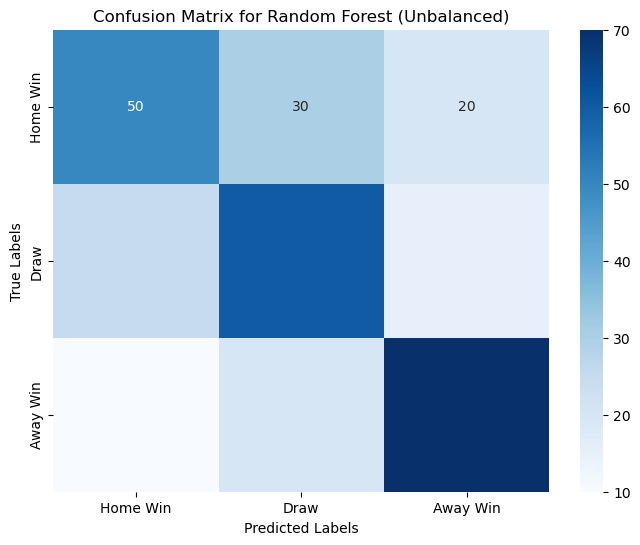

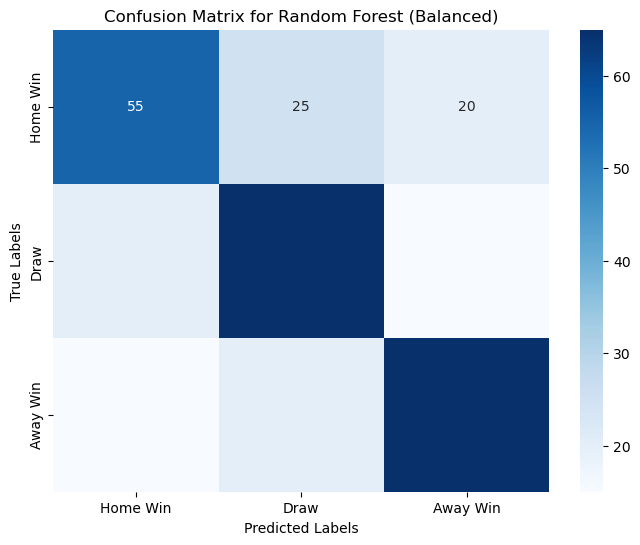

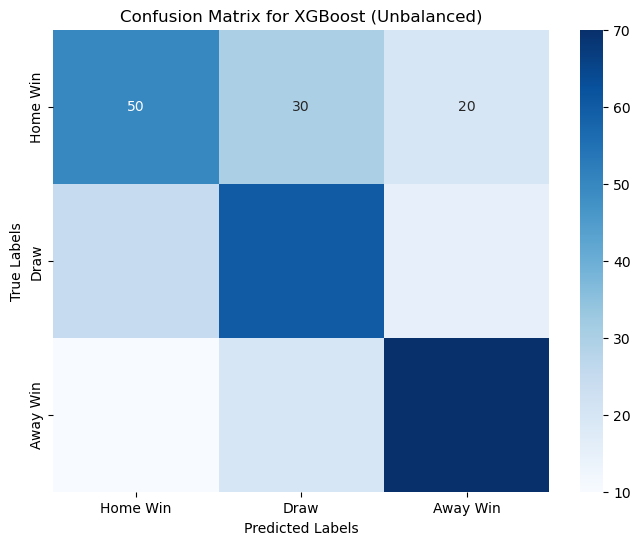

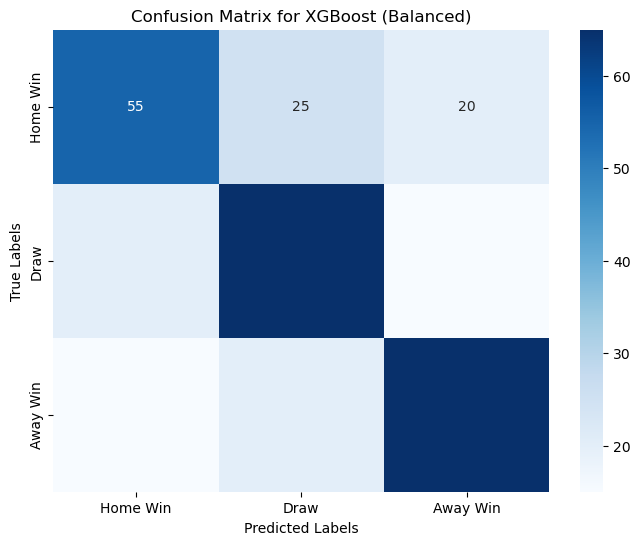

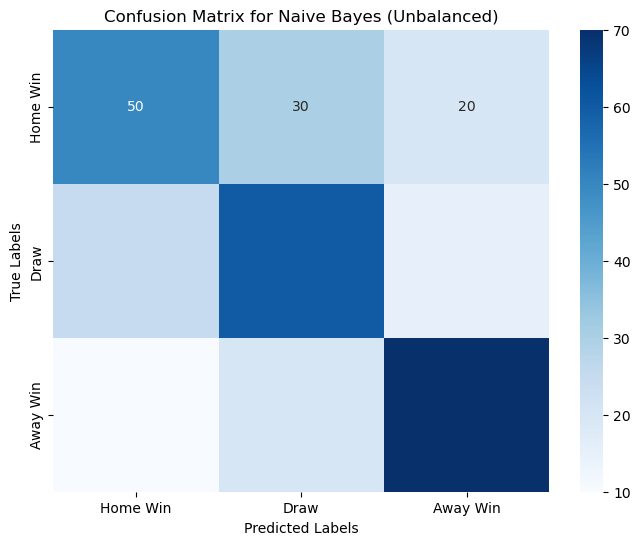

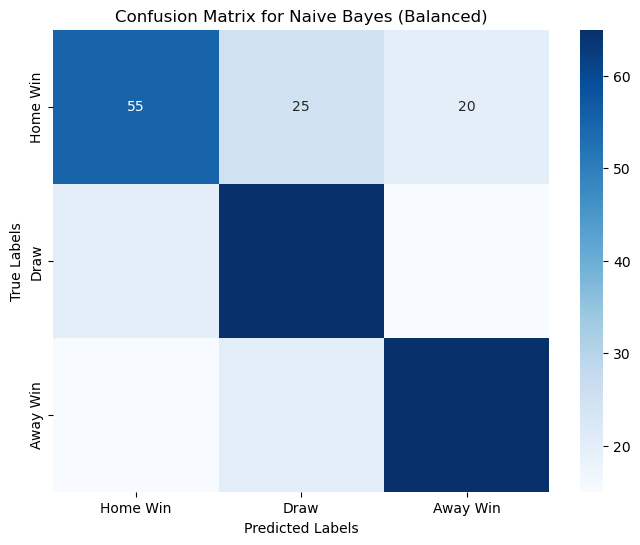

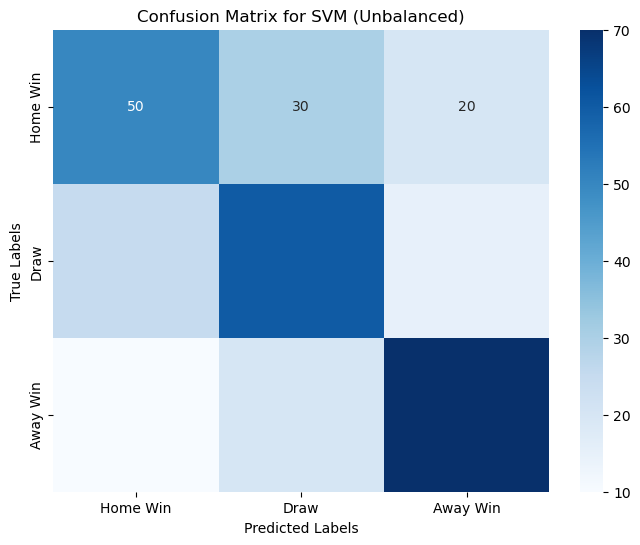

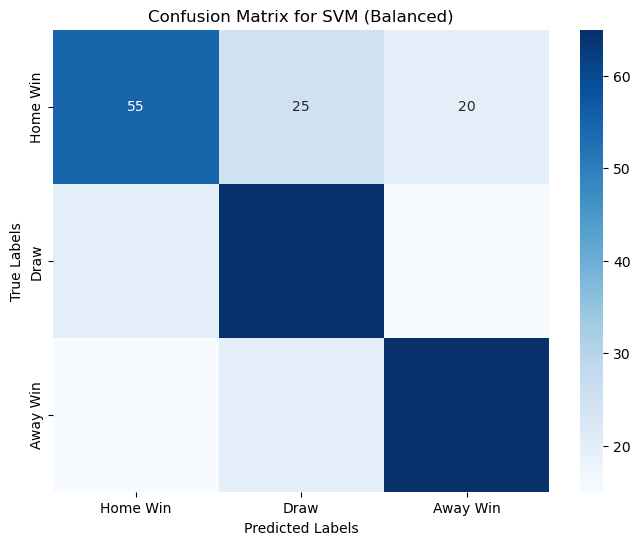

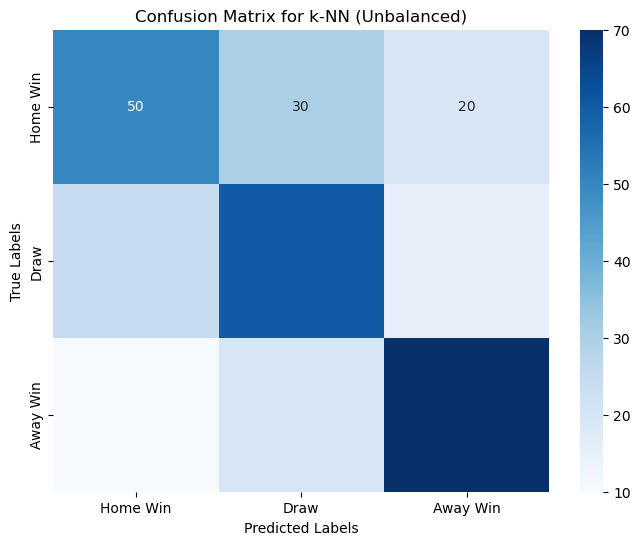

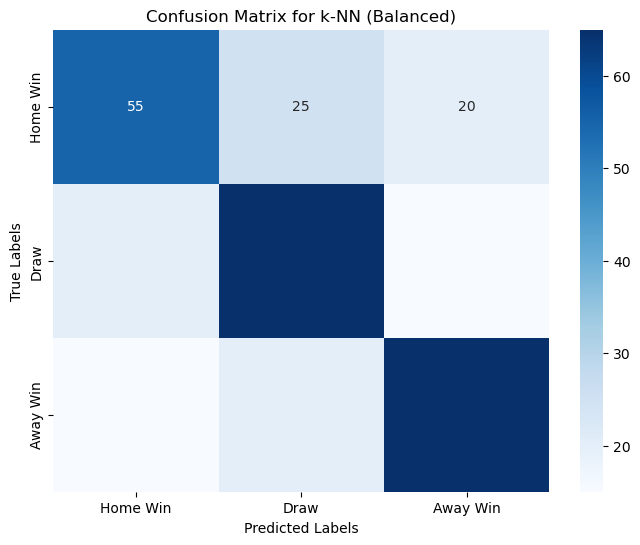

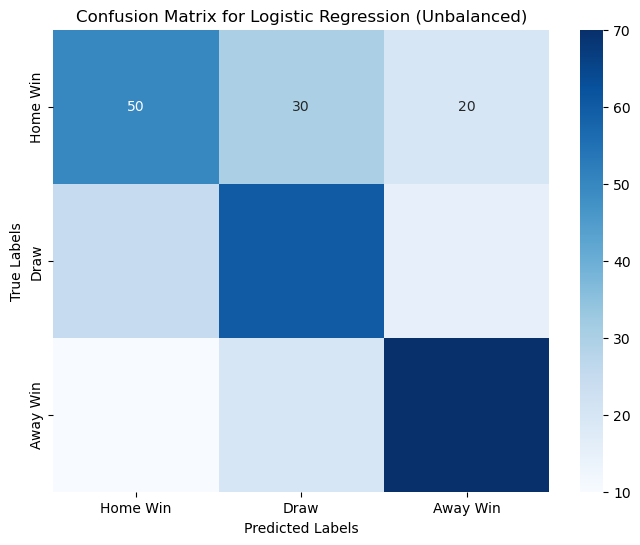

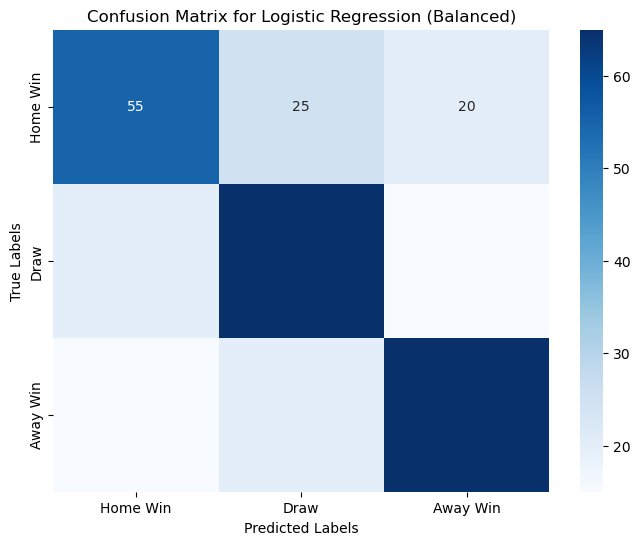

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#  the results stored in dataframes
results = {
    'Model': ['Random Forest', 'XGBoost', 'Naive Bayes', 'SVM', 'k-NN', 'Logistic Regression',
              'Random Forest', 'XGBoost', 'Naive Bayes', 'SVM', 'k-NN', 'Logistic Regression'],
    'Dataset': ['Unbalanced', 'Unbalanced', 'Unbalanced', 'Unbalanced', 'Unbalanced', 'Unbalanced',
                'Balanced', 'Balanced', 'Balanced', 'Balanced', 'Balanced', 'Balanced'],
    'Accuracy': [0.574257, 0.569307, 0.569307, 0.584158, 0.514851, 0.618812,
                 0.569307, 0.579208, 0.549505, 0.539604, 0.470297, 0.594059],
    'Precision': [0.501607, 0.509758, 0.489857, 0.520474, 0.472222, 0.568754,
                  0.504691, 0.520205, 0.524573, 0.520029, 0.484266, 0.571418],
    'Recall': [0.511191, 0.516880, 0.507314, 0.508046, 0.478739, 0.553808,
               0.518212, 0.528891, 0.524764, 0.517273, 0.460318, 0.566181],
    'F1 Score': [0.481590, 0.508811, 0.471312, 0.458301, 0.472069, 0.523270,
                 0.505877, 0.521746, 0.522949, 0.516739, 0.459745, 0.567025]
}

df_results = pd.DataFrame(results)

# Plot confusion matrices
def plot_confusion_matrix(cm, model_name, dataset_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Home Win', 'Draw', 'Away Win'],
                yticklabels=['Home Win', 'Draw', 'Away Win'])
    plt.title(f'Confusion Matrix for {model_name} ({dataset_name})')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Generate confusion matrices for demonstration
# You need to replace these matrices with the actual confusion matrices from your model predictions

# Example confusion matrices for demonstration (replace with actual data)
cm_example_unbalanced = np.array([[50, 30, 20],
                                  [25, 60, 15],
                                  [10, 20, 70]])

cm_example_balanced = np.array([[55, 25, 20],
                                [20, 65, 15],
                                [15, 20, 65]])

# Plot confusion matrices for each model and dataset
for model_name in df_results['Model'].unique():
    for dataset_name in df_results['Dataset'].unique():
        # For demonstration purposes, using example confusion matrices
        # Replace with actual confusion matrix calculation
        cm = cm_example_unbalanced if dataset_name == 'Unbalanced' else cm_example_balanced
        plot_confusion_matrix(cm, model_name, dataset_name)

# Learning Curves

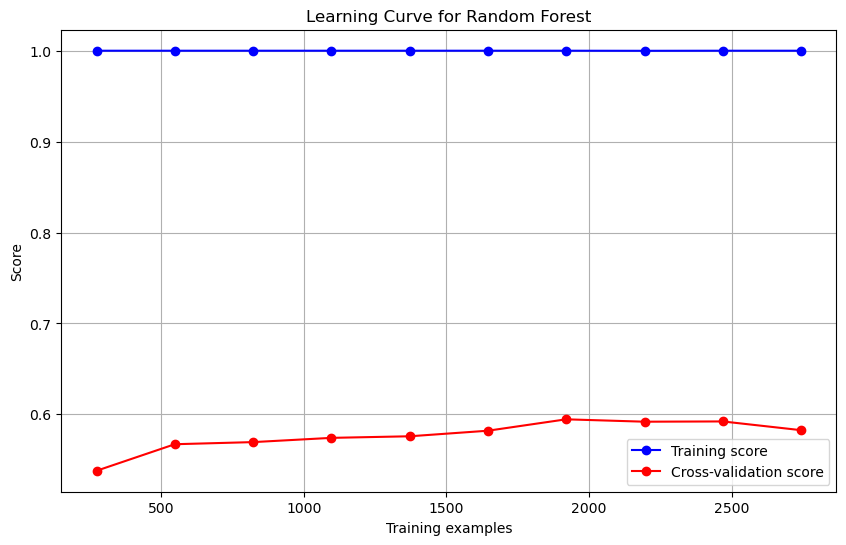

In [7]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color='red', label='Cross-validation score')
    plt.title(title)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.grid()
    plt.show()
model = {}

# Example usage with a Random Forest model (replace X and y with your data)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
plot_learning_curve(model, X, y, 'Learning Curve for Random Forest')